# Riming with w and saturation

Here only the polar night data is shown 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd 
import seaborn as sns

## 1. Data

In [2]:
fig_path='../../../plots/publication_plots/paper_wrapper_2023/'

# subset of processes which should be used later on:
fr_proc_list_sel = ["deposition_fr", "sublimation_fr"]
fr_proc_names_sel = ["Deposition", "Sublimation"]

In [3]:
processed_data_path = '../../../data/processed/'

# load data
df_fr_tends_pn = pd.read_csv(processed_data_path + 'df_fr_tends_NDJF_2122.csv')
df_fr_tends_pd = pd.read_csv(processed_data_path + 'df_fr_tends_MJJA_S21.csv')

# combine dataframes
df_fr_tends = pd.concat([df_fr_tends_pn, df_fr_tends_pd]).reset_index(drop=True)

In [4]:
df_fr_tends.iloc[:, 0:11] = df_fr_tends.iloc[:, 0:11].mask(df_fr_tends.iloc[:, 0:11] < 1e-18)
df_fr_tends_pd.iloc[:, 0:11] = df_fr_tends_pd.iloc[:, 0:11].mask(df_fr_tends_pd.iloc[:, 0:11] < 1e-18)
df_fr_tends_pn.iloc[:, 0:11] = df_fr_tends_pn.iloc[:, 0:11].mask(df_fr_tends_pn.iloc[:, 0:11] < 1e-18)

# divide each column by the total
df_fr_tends_perc = df_fr_tends[fr_proc_list_sel].div(df_fr_tends['total_fr'], axis=0)*100
df_fr_tends_perc_pn = df_fr_tends_pn[fr_proc_list_sel].div(df_fr_tends_pn['total_fr'], axis=0)*100
df_fr_tends_perc_pd = df_fr_tends_pd[fr_proc_list_sel].div(df_fr_tends_pd['total_fr'], axis=0)*100

# add the other columns
df_fr_tends_perc['W'] = df_fr_tends['W']
df_fr_tends_perc_pn['W'] = df_fr_tends_pn['W']
df_fr_tends_perc_pd['W'] = df_fr_tends_pd['W']

display(df_fr_tends_perc.describe())

,deposition_fr,sublimation_fr,W
count,4.374111e+06,3.653340e+06,1.068749e+07
mean,9.675129e+01,9.867451e+01,5.726840e-02
std,1.263224e+01,8.291692e+00,3.173919e-01
min,3.805338e-03,2.726710e-04,-4.487321e+00
25%,9.985462e+01,1.000000e+02,-4.662419e-02
50%,1.000000e+02,1.000000e+02,7.687434e-03
75%,1.000000e+02,1.000000e+02,9.583619e-02
max,1.000000e+02,1.000000e+02,6.243128e+00


## 2. Plots

### 2.1 Wind binning

The distribution is quite similar for different binning sizes (0.1-0.4) at 0.5 the deposition shows a clearer increase with upwards velocity.

In [5]:
w_bins = np.arange(-3, 3, 0.3)
# xticks
w_bins_labels =np.arange(-2.9, 3, 0.3)

print(w_bins_labels)

df_fr_tends_perc['W_bins'] = pd.cut(df_fr_tends_perc['W'], bins=w_bins)
df_fr_tends_perc_pd['W_bins'] = pd.cut(df_fr_tends_perc_pd['W'], bins=w_bins)
df_fr_tends_perc_pn['W_bins'] = pd.cut(df_fr_tends_perc_pn['W'], bins=w_bins)

[-2.9 -2.6 -2.3 -2.  -1.7 -1.4 -1.1 -0.8 -0.5 -0.2  0.1  0.4  0.7  1.
  1.3  1.6  1.9  2.2  2.5  2.8]


Settings for plot so that same color is used as in others etc.

In [6]:
color_map = sns.color_palette("husl", 6)[::-1]
color_dep = color_map[2]
color_sub = color_map[3]

nrows=1
ncols=4

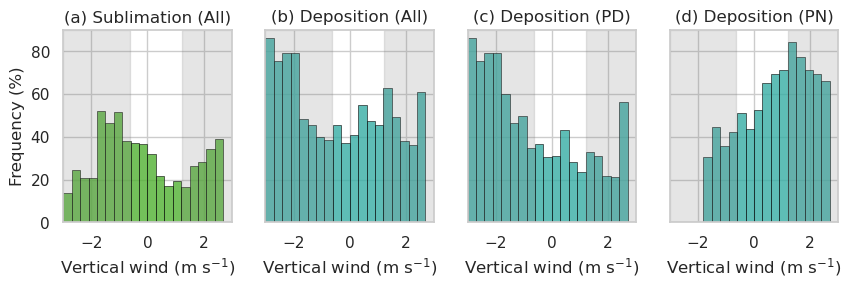

In [8]:
# create a figure with 4 subplots. They should be arranged in 2 rows and 2 columns
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,2.5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# plot with frequency of occurence
process = fr_proc_list_sel[1]
df_sub = df_fr_tends_perc[df_fr_tends_perc[process] > 1]
relative_occ = df_sub['W_bins'].value_counts().sort_index()/df_fr_tends_perc['W_bins'].value_counts().sort_index()*100
axes[0].bar(w_bins[:-1],relative_occ, color=color_sub, width=0.3, align='edge',
             edgecolor='black', linewidth=0.5, alpha=0.8, label=process)

process = "deposition_fr"
df_sub = df_fr_tends_perc[df_fr_tends_perc[process] > 1]
relative_occ = df_sub['W_bins'].value_counts().sort_index()/df_fr_tends_perc['W_bins'].value_counts().sort_index()*100
axes[1].bar(w_bins[:-1],relative_occ, color=color_dep, width=0.3, align='edge', 
                       edgecolor='black', linewidth=0.5, alpha=0.8, label=process)

df_sub_pd = df_fr_tends_perc_pd[df_fr_tends_perc_pd[process] > 1]
relative_occ = df_sub_pd['W_bins'].value_counts().sort_index()/df_fr_tends_perc_pd['W_bins'].value_counts().sort_index()*100
axes[2].bar(w_bins[:-1],relative_occ, color=color_dep, width=0.3, align='edge', 
                       edgecolor='black', linewidth=0.5, alpha=0.8, label=process)

df_sub_pn = df_fr_tends_perc_pn[df_fr_tends_perc_pn[process] > 1]
relative_occ = df_sub_pn['W_bins'].value_counts().sort_index()/df_fr_tends_perc_pn['W_bins'].value_counts().sort_index()*100
axes[3].bar(w_bins[:-1],relative_occ, color=color_dep, width=0.3, align='edge', 
                       edgecolor='black', linewidth=0.5, alpha=0.8, label=process)

for i in range(4):
    axes[i].set_xlabel(r'Vertical wind (m s$^{-1}$)')
    axes[i].set_ylabel('')
    axes[i].set_ylim([0, 90])
    axes[i].set_xlim([-3, 3])

# don't set the ytick labels for the 2,3,4 subplot
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[3].set_yticklabels([])

axes[0].set_ylabel('Frequency (%)')

axes[0].set_title('(a) Sublimation (All)')
axes[1].set_title('(b) Deposition (All)')
axes[2].set_title('(c) Deposition (PD)')
axes[3].set_title('(d) Deposition (PN)')

# compute the lowest and highest 5% of the wind distribution
w_low = df_fr_tends_perc['W'].quantile(0.01)
w_high = df_fr_tends_perc['W'].quantile(0.99)

# mark the areas where the lowest 5% of the wind distribution is located and the highest 5% of the wind distribution
for i in range(4):
    axes[i].axvspan(-3, w_low, alpha=0.2, color='grey')
    axes[i].axvspan(w_high, 3, alpha=0.2, color='grey')


plt.savefig(fig_path + 'fig_05_depsub_w.png', dpi=300, bbox_inches='tight', format='png')
plt.savefig(fig_path + 'fig_05_depsub_w.pdf', bbox_inches='tight', format='pdf')

plt.show()
